<a href="https://colab.research.google.com/github/Bhanukoya/Natural-Language-Processing/blob/master/NLP_text_prediction_irish_song.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP - Text prediction using LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
data

'In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Ne

In [3]:
sentences = data.lower().split('\n')

In [4]:
print(sentences)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
token = Tokenizer()

In [7]:
token.fit_on_texts(sentences)

In [8]:
len(token.word_index)

262

In [9]:
sequences  = token.texts_to_sequences(sentences)

In [10]:
sequences[0:4]

[[4, 2, 66, 8, 67, 68, 69, 70],
 [71, 40, 20, 21, 72, 3, 73],
 [16, 74, 75, 1, 76, 33, 3, 77, 22],
 [41, 33, 3, 78, 1, 79, 80, 8, 81]]

In [11]:
input_sequences = []

for each_sequence in sequences:
  for i in range(1, len(each_sequence)):
    input_sequences.append(each_sequence[0:i+1])


In [12]:
a = [ len(x) for x in input_sequences]
maxlength = max(a)
maxlength

11

In [13]:
padded_input_sequences = np.array(pad_sequences(input_sequences, maxlen=maxlength, padding='pre'))

In [14]:
padded_input_sequences[0:10]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4,  2, 66],
       [ 0,  0,  0,  0,  0,  0,  0,  4,  2, 66,  8],
       [ 0,  0,  0,  0,  0,  0,  4,  2, 66,  8, 67],
       [ 0,  0,  0,  0,  0,  4,  2, 66,  8, 67, 68],
       [ 0,  0,  0,  0,  4,  2, 66,  8, 67, 68, 69],
       [ 0,  0,  0,  4,  2, 66,  8, 67, 68, 69, 70],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 71, 40],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 71, 40, 20],
       [ 0,  0,  0,  0,  0,  0,  0, 71, 40, 20, 21]], dtype=int32)

In [15]:
x = padded_input_sequences[ : , : -1]

In [16]:
labels = padded_input_sequences[: , -1]

In [17]:
x.shape

(453, 10)

In [18]:
labels.shape

(453,)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y = to_categorical(labels )

In [21]:
y[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
y.shape

(453, 263)

## Building the Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, GlobalAveragePooling1D, GlobalAvgPool1D, BatchNormalization, Dropout, Bidirectional,LSTM

In [24]:
model = Sequential()
model.add(Embedding( 263 ,64, input_length=maxlength-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(263, activation='softmax'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 64)            16832     
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                13600     
_________________________________________________________________
dense (Dense)                (None, 263)               10783     
Total params: 41,215
Trainable params: 41,215
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(x, y, epochs=500)

Epoch 1/500
15/15 [==============================] - 0s 9ms/step - loss: 5.5685 - accuracy: 0.0066
Epoch 2/500
15/15 [==============================] - 0s 9ms/step - loss: 5.5445 - accuracy: 0.0508
Epoch 3/500
15/15 [==============================] - 0s 9ms/step - loss: 5.4840 - accuracy: 0.0486
Epoch 4/500
15/15 [==============================] - 0s 9ms/step - loss: 5.2960 - accuracy: 0.0486
Epoch 5/500
15/15 [==============================] - 0s 9ms/step - loss: 5.1310 - accuracy: 0.0486
Epoch 6/500
15/15 [==============================] - 0s 9ms/step - loss: 5.0677 - accuracy: 0.0486
Epoch 7/500
15/15 [==============================] - 0s 9ms/step - loss: 5.0246 - accuracy: 0.0552
Epoch 8/500
15/15 [==============================] - 0s 9ms/step - loss: 4.9881 - accuracy: 0.0552
Epoch 9/500
15/15 [==============================] - 0s 9ms/step - loss: 4.9540 - accuracy: 0.0596
Epoch 10/500
15/15 [==============================] - 0s 9ms/step - loss: 4.9148 - accuracy: 0.0552
Epoch 11/

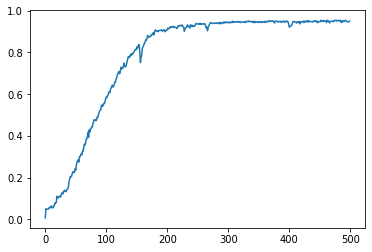

In [27]:
plt.plot(range(500), history.history['accuracy'])

In [28]:
reversed = dict([(value, key) for key, value in token.word_index.items()])

## Preciting next word of an example

In [33]:
example ="Bhanu went to dublin"


In [34]:
seq = token.texts_to_sequences([example])[0]
pad = pad_sequences([seq], maxlen=10, padding='pre', truncating='pre')
predicted = model.predict_classes(pad)
for i in predicted:
  predicted_int= int(i)

new_word = reversed[predicted_int]
example= example + ' ' + new_word
print(example)

print(seq)
print(pad)

Bhanu went to dublin the
[134, 13, 59]
[[  0   0   0   0   0   0   0 134  13  59]]


## Predicting next 100 words

In [37]:
example ="Bhanu went to dublin"

In [38]:
for k in range(100):
  seq = token.texts_to_sequences([example])[0]
  pad = pad_sequences([seq], maxlen=10, padding='pre', truncating='pre')
  predicted = model.predict_classes(pad)
  for i in predicted:
    predicted_int= int(i)

  new_word = reversed[predicted_int]
  example= example + ' ' + new_word
print(example)



Bhanu went to dublin the end to lanigans ball ball brooks hall had me gray sweetheart me free me up up me up free invitation me in no free taras further further further glisten them me me new strangled hall painted painted call had me sweetheart hall eyes me me me up new eyes me me ball ball me me me ball nelly me me me me me free me me me me free free further further them me me me me me new row man as further further them me me new lanigans lanigans ball ball ball ball ball youll call had nonsense
